# <a id='100'><font color='blue'>Time series analysis of energy related ETFs and stocks </a>

# <font color='red'>Table of Content:
# <font color='green'>- <a href='#1'>1. Yahoo Finance API</a>
# <font color='green'>- <a href='#2'>2. Moving averages</a>
# <font color='green'>- <a href='#3'>3. Average daily returns</a>
# <font color='green'>- <a href='#4'>4. Correlation of closing prices</a>
# <font color='green'>- <a href='#5'>5. Investing Risks</a>
# <font color='green'>- <a href='#6'>6. Predicting closing prices</a>
# <font color='green'>- <a href='#7'>7. Project T2: LSTM vs GRU (Tensorflow)</a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# <a id='1'> 1. Yahoo Finance API</a>

In [3]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

# Fetching most up-to-date data: 

# <font color='orange'> Category I (oil and gas only):
## <font color='orange'> XOM (EXXONMOBIL/oil & gas)
## <font color='orange'> DVN (DEVON/oil & gas)

# <font color='blue'> Category II (electricity):
## <font color='blue'> EXC (EXELON /electricity)
## <font color='blue'> D (Dominion /electricity, gas & oil)

In [5]:
tech_list = ['XOM', 'DVN', 'EXC', 'D'] #['TSLA', 'LIT', 'OIL', 'BOIL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Check individual dataframe

In [13]:
XOM.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-12-06,61.720001,62.160000,61.419998,61.580002,59.230331,19210500,XOM
2021-12-07,62.340000,63.029999,62.099998,62.270000,59.893993,19800400,XOM
2021-12-08,62.610001,63.189999,62.340000,62.450001,60.067131,18214400,XOM
2021-12-09,62.049999,62.770000,61.810001,62.610001,60.221024,16910300,XOM
2021-12-10,63.270000,63.349998,62.230000,63.009998,60.605762,17942400,XOM


# Target Distribution

<AxesSubplot:xlabel='Close'>

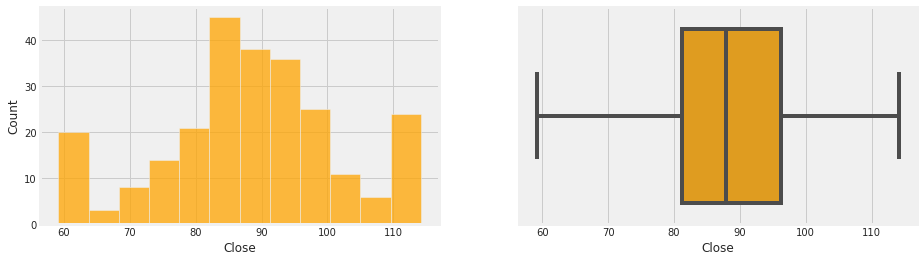

In [39]:

fig,ax=plt.subplots(1,2,figsize=(14,4))
sns.histplot(XOM.Close,color='orange',ax=ax[0])
sns.boxplot(XOM.Close,color='orange',ax=ax[1])

# Price and Volume

<AxesSubplot:xlabel='Volume', ylabel='Close'>

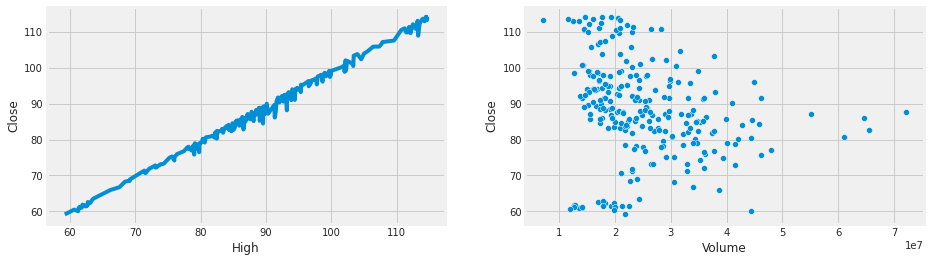

In [54]:

fig,ax=plt.subplots(1,2,figsize=(14,4))
sns.lineplot(XOM.High,XOM.Close, ax=ax[0])
sns.scatterplot(XOM.Volume,XOM.Close, ax=ax[1])

# Correlation within XOM

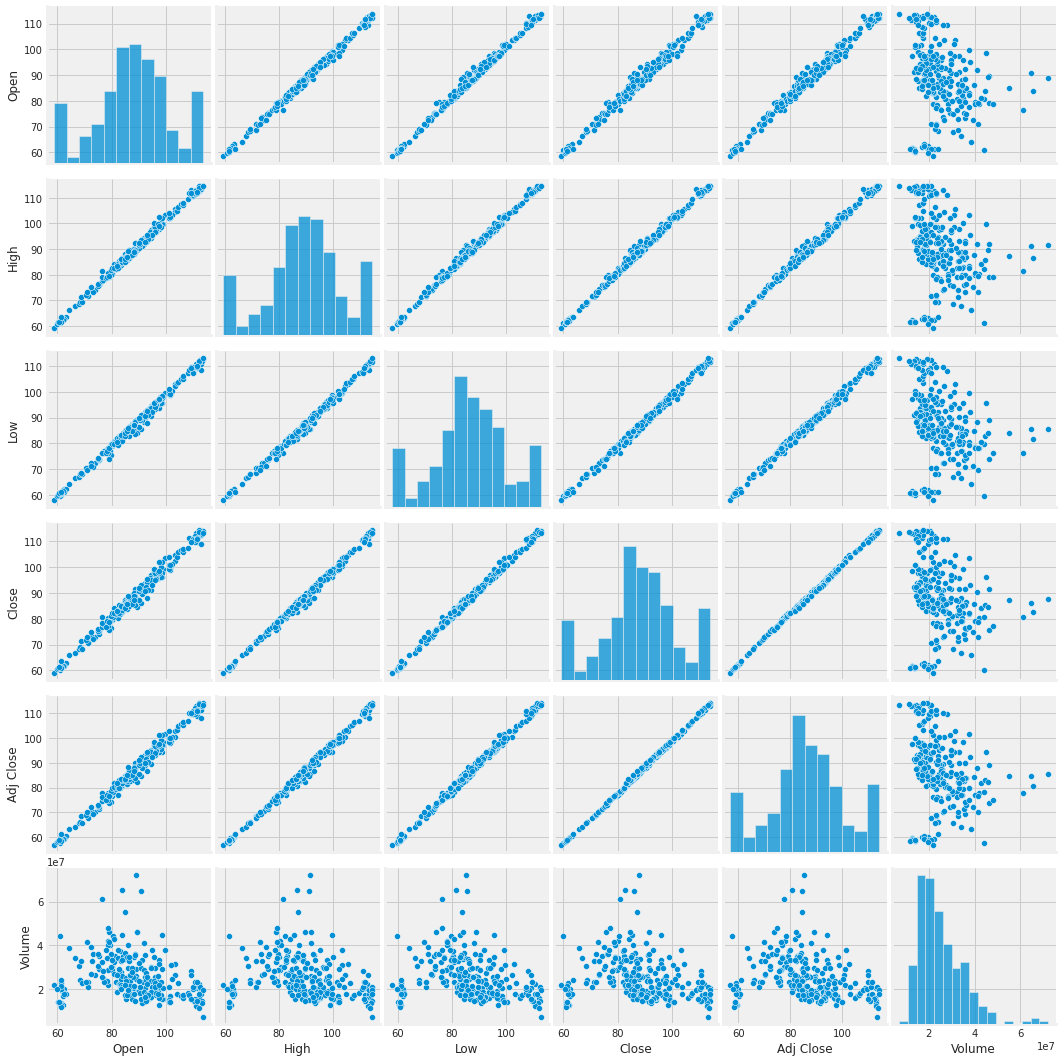

In [30]:
sns.pairplot(XOM)

<AxesSubplot:>

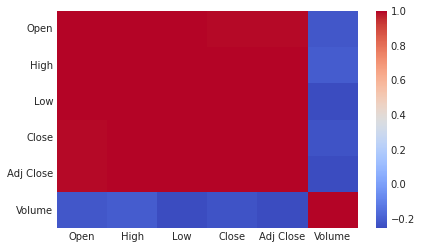

In [16]:
sns.heatmap(XOM.corr(),cmap='coolwarm')

# Combining 4 dataframes

In [56]:
company_list = [XOM, DVN, EXC, D]#[TSLA, LIT, OIL, BOIL]
company_name = ['XOM', 'DVN', 'EXC', 'D']#['TSLA', 'LIT', 'OIL', 'BOIL']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-28,61.099998,61.689999,60.439999,60.619999,59.957352,6469000,D
2022-11-29,60.259998,60.259998,59.439999,59.770000,59.116646,3895500,D
2022-11-30,59.590000,61.259998,59.150002,61.110001,60.441998,9255500,D
2022-12-01,60.820000,61.189999,59.930000,60.369999,60.369999,6435300,D
2022-12-02,59.919998,60.740002,59.759998,60.470001,60.470001,4440700,D


In [57]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,67.469929,68.433299,66.510786,67.525660,66.048566,1.234735e+07
std,19.427615,19.638831,19.244905,19.456766,19.299005,9.984469e+06
min,35.410000,36.669998,35.189999,35.540001,35.232853,1.236100e+06
25%,48.127501,48.749999,47.462500,48.307502,46.761075,4.930825e+06
50%,68.895000,70.509998,67.954998,69.070000,68.282658,9.371650e+06
75%,82.375002,83.257500,81.457502,82.382498,80.488926,1.671658e+07
max,113.879997,114.660004,113.059998,114.180000,114.180000,7.208230e+07


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2021-12-06 to 2022-12-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


# Visualize the combined dataframe

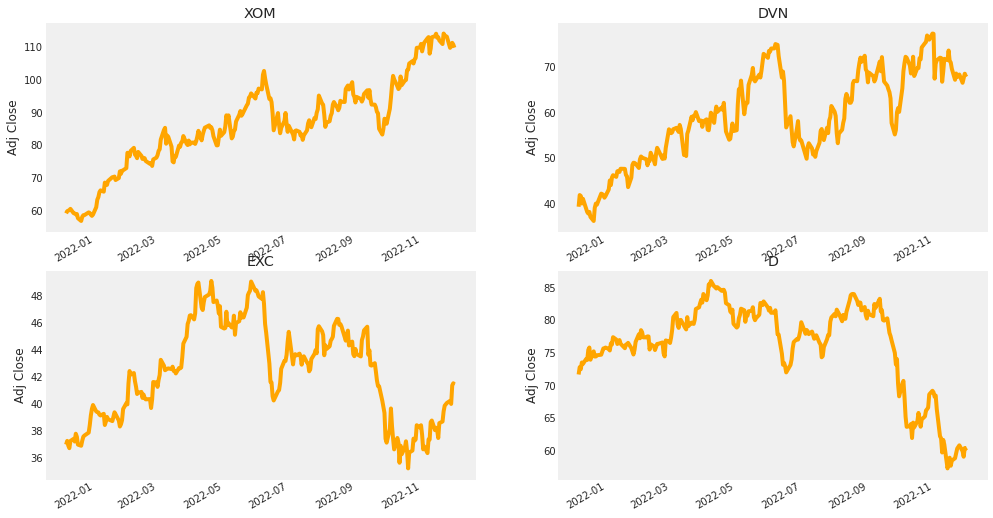

In [65]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='orange')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")
    plt.grid()

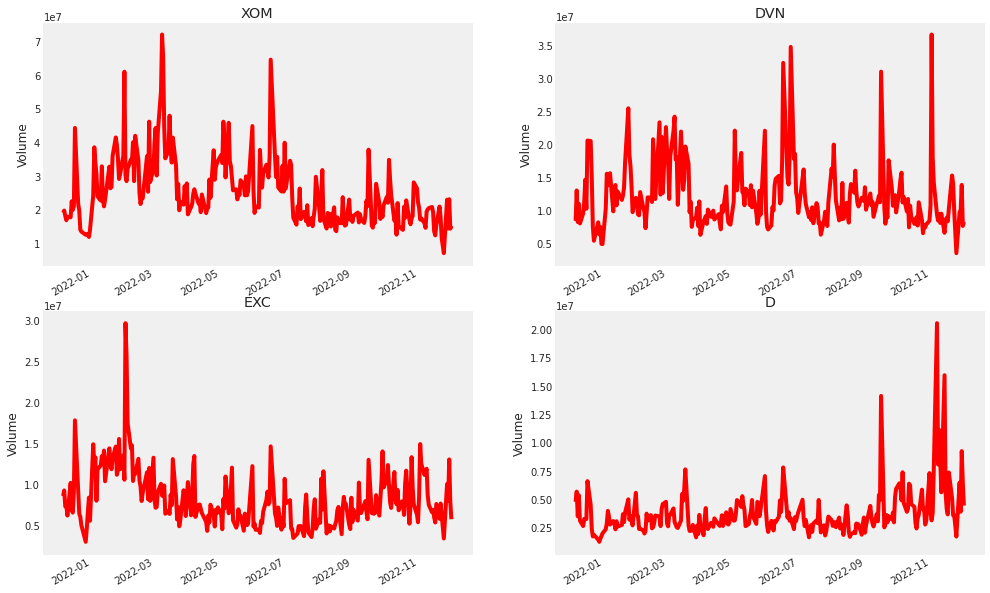

In [62]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='red')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")
    plt.grid()

# <a id='2'> 2. Plotting Moving averages</a>

<a href='#100'> Back to top</a>

In [81]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [82]:
print(XOM.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 200 days', 'MA for 5 days',
       'MA for 50 days'],
      dtype='object')


Text(0.5, 1.0, 'DVN')

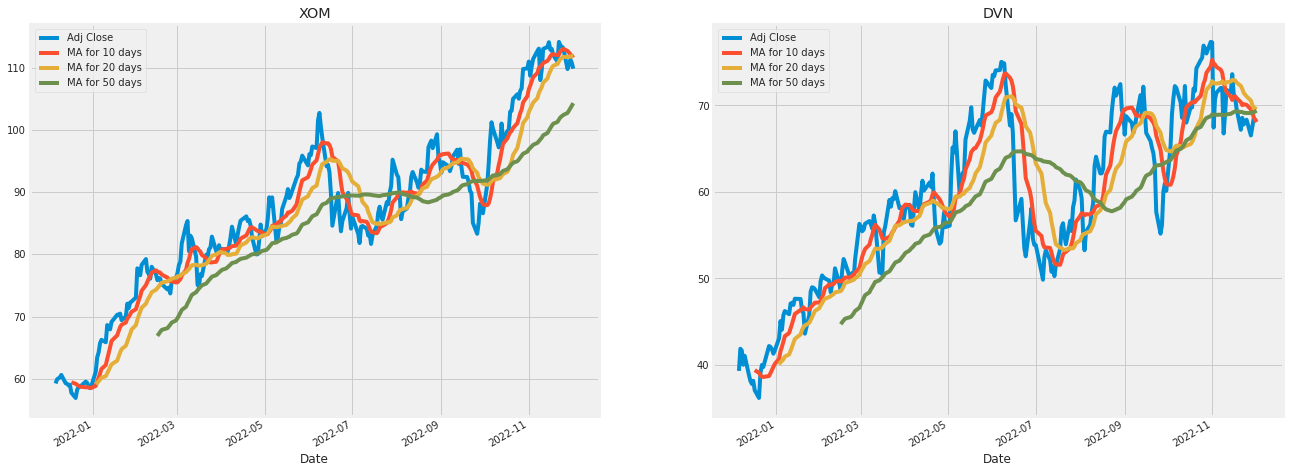

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

XOM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('XOM')

DVN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('DVN')

# <a id='3'> 3. Average daily returns

<a href='#100'> Back to top</a>

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

Text(0.5, 1.0, 'DVN')

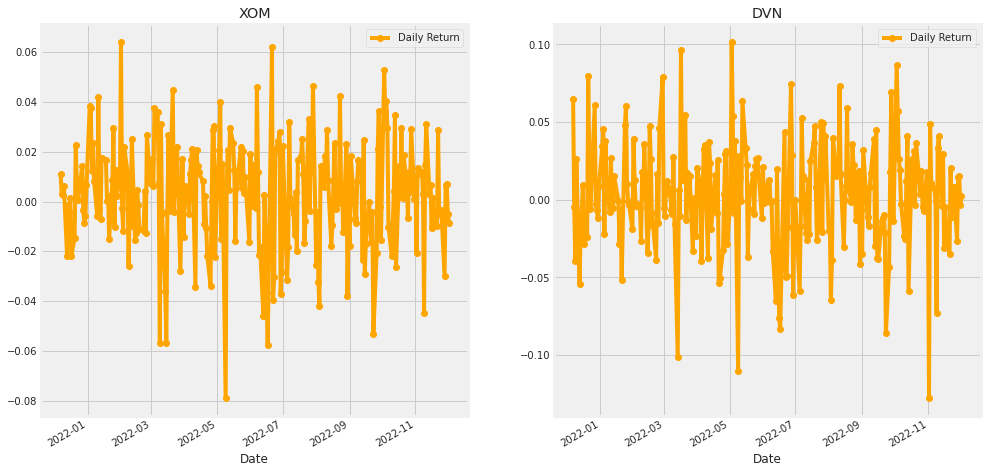

In [101]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

XOM['Daily Return'].plot(ax=axes[0], legend=True, linestyle='-', marker='o',color="orange")
axes[0].set_title('XOM')

DVN['Daily Return'].plot(ax=axes[1], legend=True, linestyle='-', marker='o',color="orange")
axes[1].set_title('DVN')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

Text(0, 0.5, 'Daily Return')

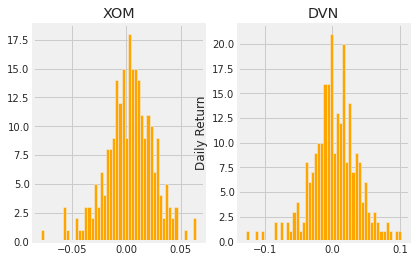

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2)
XOM['Daily Return'].hist(bins=50,ax=axes[0],color='orange')
axes[0].set_title('XOM')

DVN['Daily Return'].hist(bins=50,ax=axes[1],color='orange')
axes[1].set_title('DVN')
plt.ylabel('Daily Return')

# <a id='4'>4. Correlation between closing prices

<a id='3'>

<a href='#100'> Back to top</a>

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,XOM,DVN,EXC,D
Date,,,,
2021-12-06,59.230324,39.309956,36.996811,71.693855
2021-12-07,59.894001,41.871227,37.266357,72.822975
2021-12-08,60.067131,41.676350,36.927700,72.504494
2021-12-09,60.221027,40.021397,36.727268,73.527466
2021-12-10,60.605762,41.061646,37.259445,73.305496


In [17]:
# Make a new tech returns DataFrame
percentage_change = closing_df.pct_change()
percentage_change.head()

Symbols,XOM,DVN,EXC,D
Date,,,,
2021-12-06,NaN,NaN,NaN,NaN
2021-12-07,0.011205,0.065156,0.007286,0.015749
2021-12-08,0.002891,-0.004654,-0.009087,-0.004373
2021-12-09,0.002562,-0.039710,-0.005428,0.014109
2021-12-10,0.006389,0.025992,0.014490,-0.003019


# XOM vs DVN (Comparing within Category 1)

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

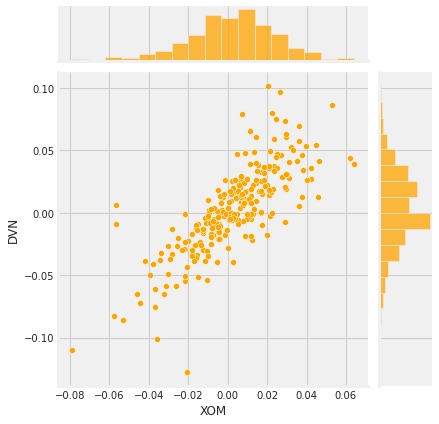

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='XOM', y='DVN', data=percentage_change, kind='scatter', color='orange')

# XOM vs D (Comparing between Categories)

In [1]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='XOM', y='D', data=percentage_change, kind='scatter',color='red')

NameError: name 'sns' is not defined

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

# percentage_change

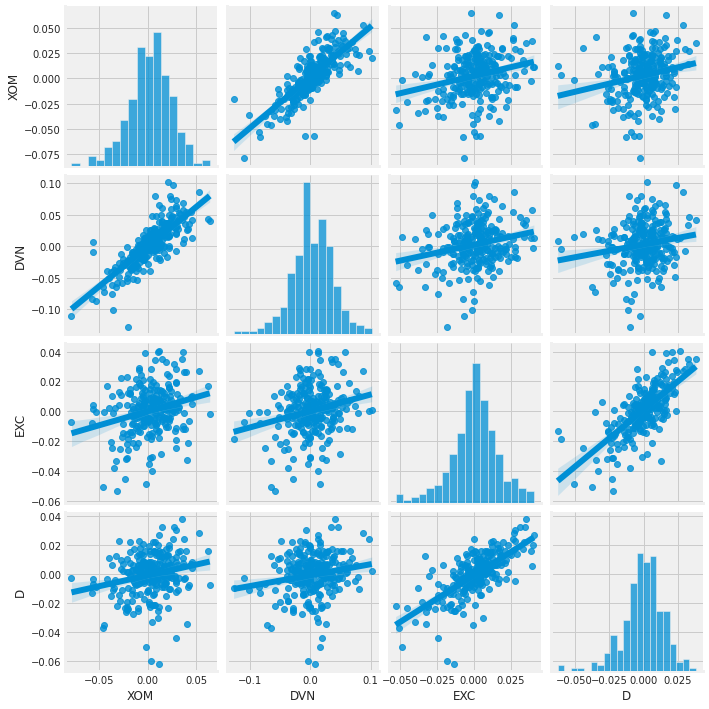

In [20]:
sns.pairplot(percentage_change, kind='reg', alpha=0.3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

# percentage_change 2

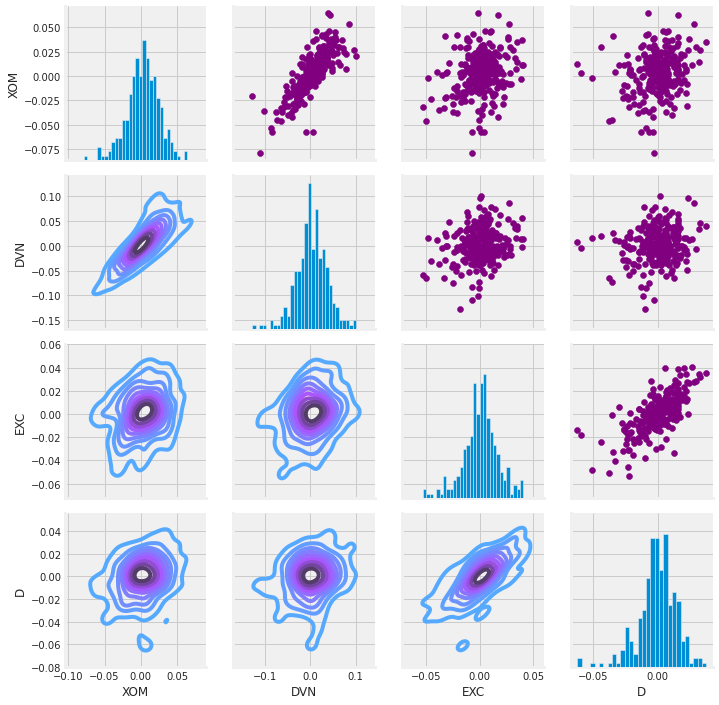

In [21]:
return_fig = sns.PairGrid(percentage_change.dropna())
return_fig.map_upper(plt.scatter, color='orange',alpha=0.3)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

# Closing Prices 

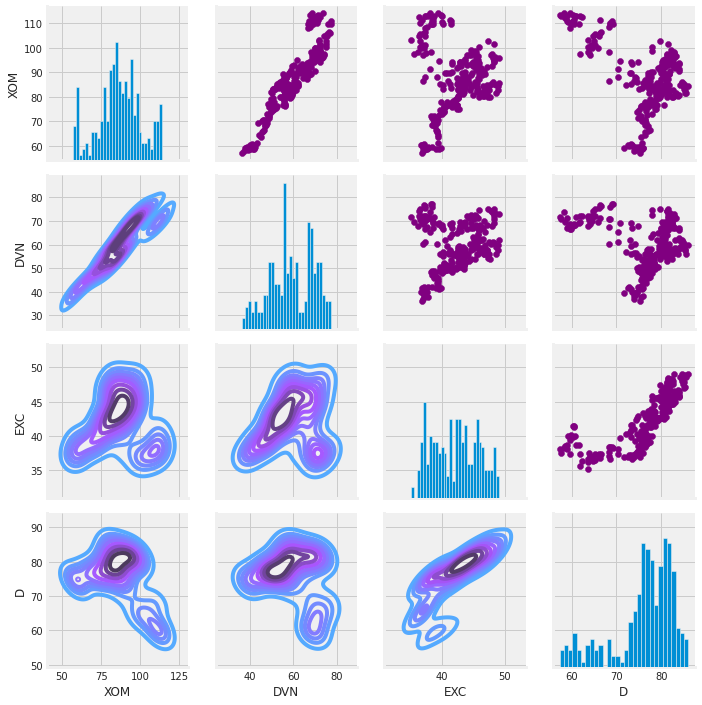

In [22]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='orange',alpha=0.4)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

# Heatmap by percentage_change (Category 1 vs 2)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

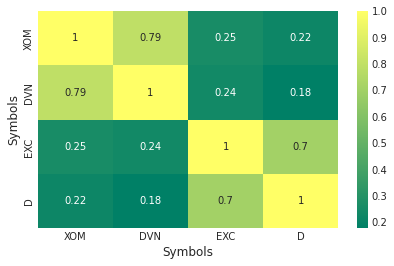

In [23]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(percentage_change.corr(), annot=True, cmap='coolwarm')

# Heatmap by closing prices (Category 1 vs 2)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

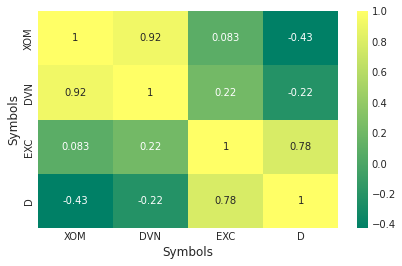

In [24]:
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# <a id='5'>5. Investing Risks of the two categories

<a href='#100'> Back to top</a>

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

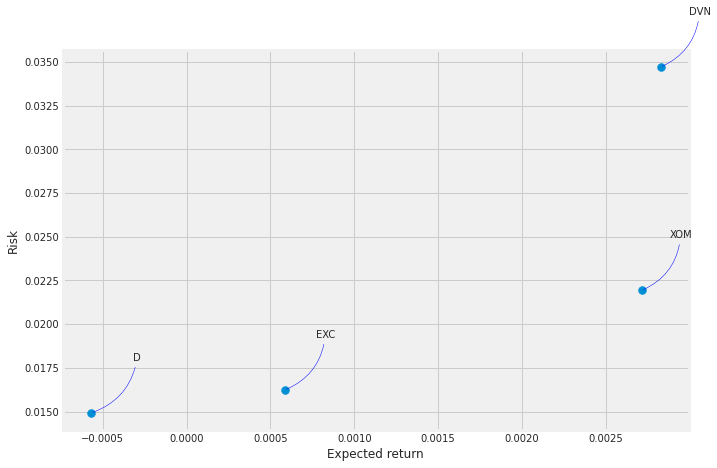

In [25]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
returns = percentage_change.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# <a id='6'>6. Predicting closing prices from history

<a href='#100'> Back to top</a>

# Fetch data since the year 2012

In [26]:
# Get the stock quote
df = DataReader('XOM', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,86.669998,85.900002,85.970001,86.000000,20906800.0,54.916367
2012-01-04,86.150002,85.099998,85.790001,86.019997,16130900.0,54.929108
2012-01-05,85.949997,84.919998,85.639999,85.760002,17452800.0,54.763084
2012-01-06,86.000000,85.110001,85.919998,85.120003,15942100.0,54.354416
2012-01-09,85.639999,84.970001,85.000000,85.500000,11664200.0,54.597069
...,...,...,...,...,...,...
2022-11-28,111.459999,109.620003,110.660004,109.809998,23015500.0,109.809998
2022-11-29,111.800003,109.790001,110.610001,110.540001,14453200.0,110.540001
2022-11-30,111.900002,109.779999,111.540001,111.339996,23153400.0,111.339996


# Taking 95% data as training set

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2612

# MinMaxScaler

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.65937386],
       [0.65961557],
       [0.65647288],
       ...,
       [0.96567141],
       [0.95914424],
       [0.94778194]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.65937386, 0.65961557, 0.65647288, 0.64873688, 0.6533301 ,
       0.65598937, 0.64825337, 0.64414357, 0.64583581, 0.65562676,
       0.66481321, 0.67182399, 0.67738423, 0.67714252, 0.67363713,
       0.67412064, 0.66868121, 0.65731901, 0.6532092 , 0.63205605,
       0.63483622, 0.62951769, 0.64631932, 0.65635198, 0.66348357,
       0.65115435, 0.64583581, 0.63278137, 0.64027557, 0.64329745,
       0.63664937, 0.65224227, 0.65478064, 0.66626374, 0.67049435,
       0.67170308, 0.67557109, 0.67424154, 0.67315362, 0.66541762,
       0.66940652, 0.66336276, 0.67158228, 0.65768162, 0.65731901,
       0.64523149, 0.63882512, 0.65393452, 0.66976913, 0.65961557,
       0.66046169, 0.6646924 , 0.67134047, 0.66662635, 0.65949476,
       0.65127525, 0.65393452, 0.67182399, 0.66686815, 0.65768162])]
[0.6603408844481482]

[array([0.65937386, 0.65961557, 0.65647288, 0.64873688, 0.6533301 ,
       0.65598937, 0.64825337, 0.64414357, 0.64583581, 0.65562676,
       0.66481321, 0.67182399, 0.677

# LSTM (Keras)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-12-04 13:56:37.356533: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-04 13:56:38.015068: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2552/2552 [==============================] - 108s 41ms/step - loss: 0.0012


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.1239146626955976

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


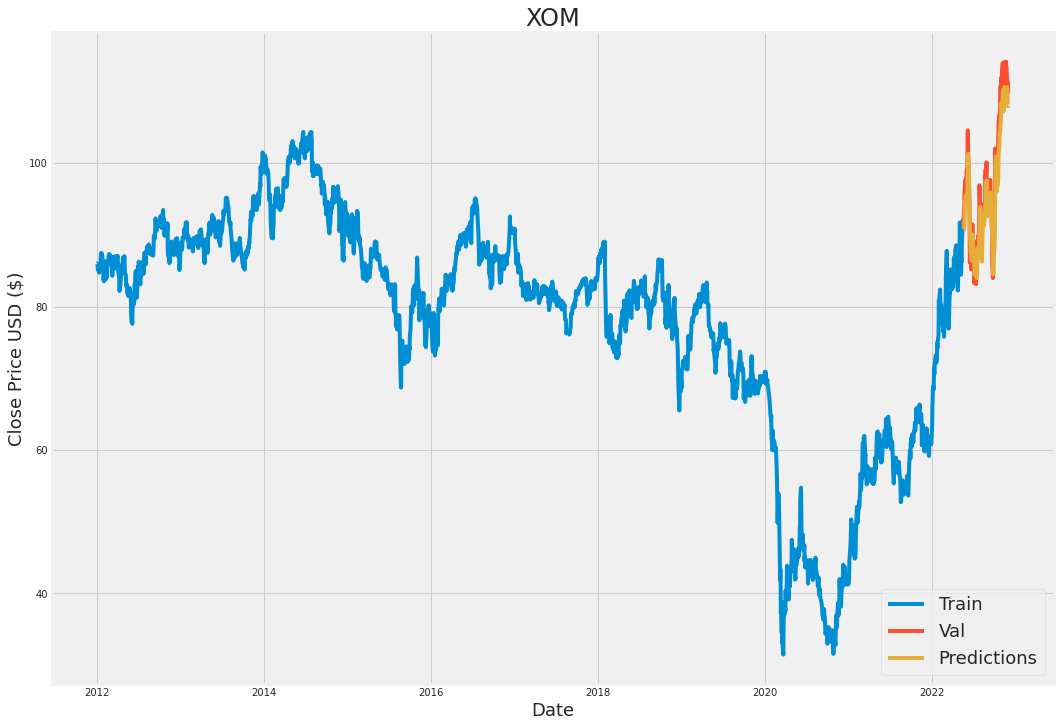

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,12))
plt.title('XOM',fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=18)
#plt.grid()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-05-19,91.139999,90.741966
2022-05-20,91.860001,90.759171
2022-05-23,93.889999,90.802513
2022-05-24,94.400002,91.615021
2022-05-25,96.300003,92.462563
...,...,...
2022-11-28,109.809998,110.579094
2022-11-29,110.540001,108.993698
2022-11-30,111.339996,107.983986


# Double Neurons of LSTM Layers

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2552/2552 [==============================] - 196s 76ms/step - loss: 0.0014


In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.380001683780085

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


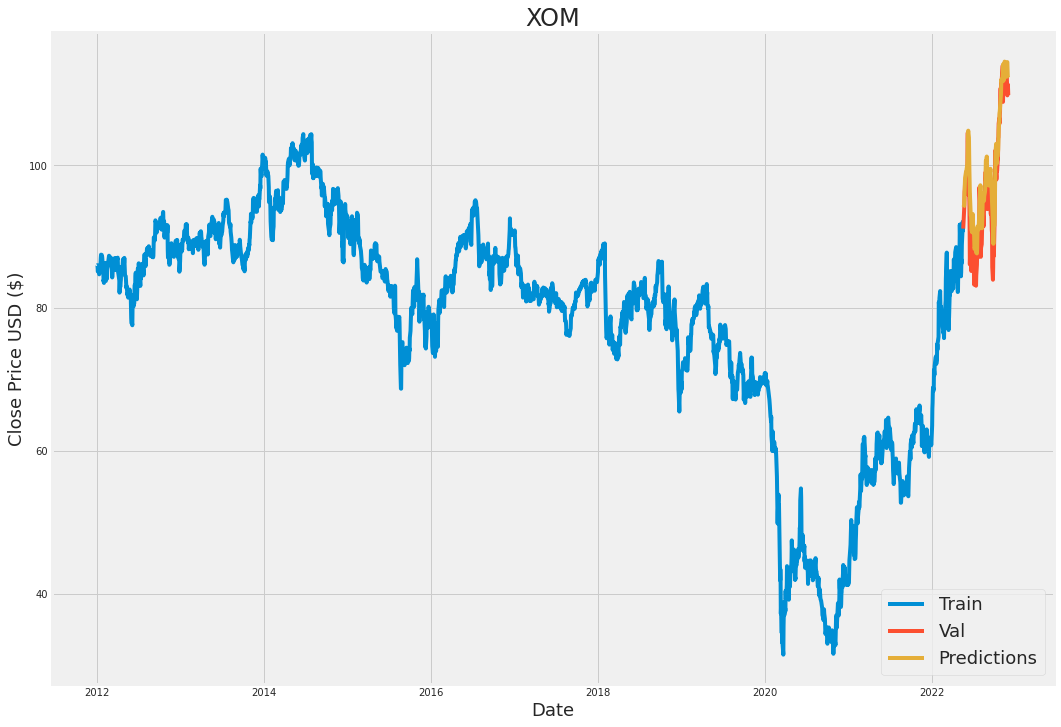

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,12))
plt.title('XOM',fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=18)
plt.show()

# Other optimizer: rmsprop

RMSprop is a gradient-based optimization technique used in training neural networks.

Adam (Kingma & Ba, 2014) is a first-order-gradient-based algorithm of stochastic objective functions, based on adaptive estimates of lower-order moments.

RMSProp with momentum generates its parameter updates using a momentum on the rescaled gradient, whereas Adam updates are directly estimated using a running average of first and second moment of the gradient.

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2552/2552 [==============================] - 105s 40ms/step - loss: 0.0020


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.7819669190281164

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


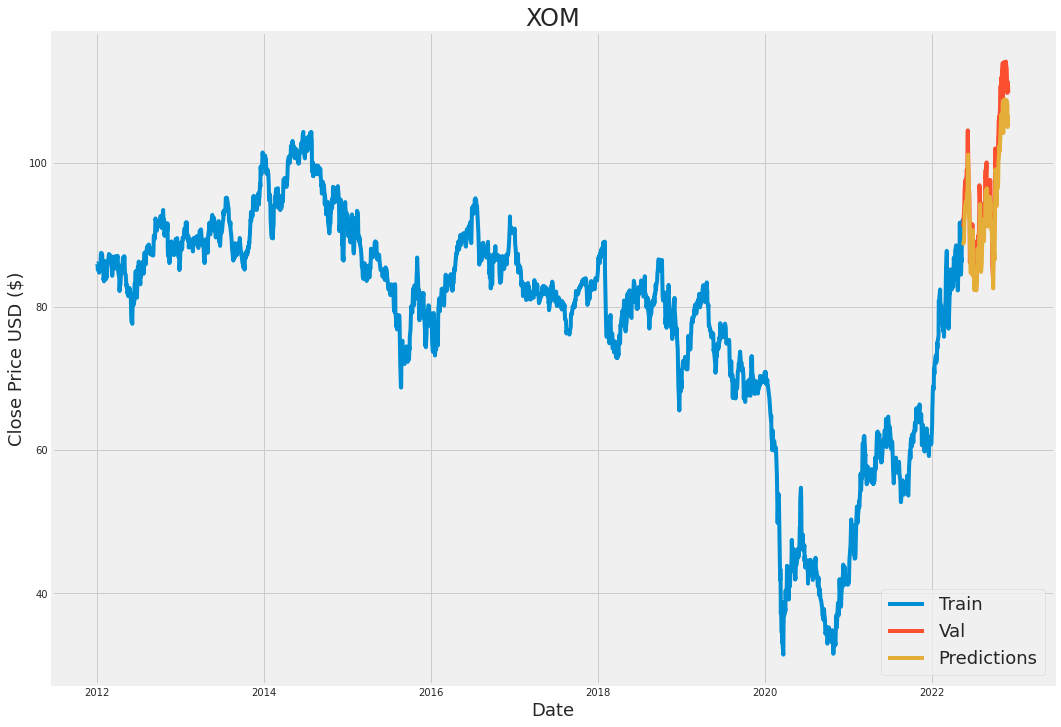

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,12))
plt.title('XOM',fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=18)
plt.show()

# Tuning batch and epoch

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
1276/1276 [==============================] - 63s 47ms/step - loss: 0.0014
Epoch 2/2
1276/1276 [==============================] - 60s 47ms/step - loss: 6.1709e-04


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.310806607392155

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


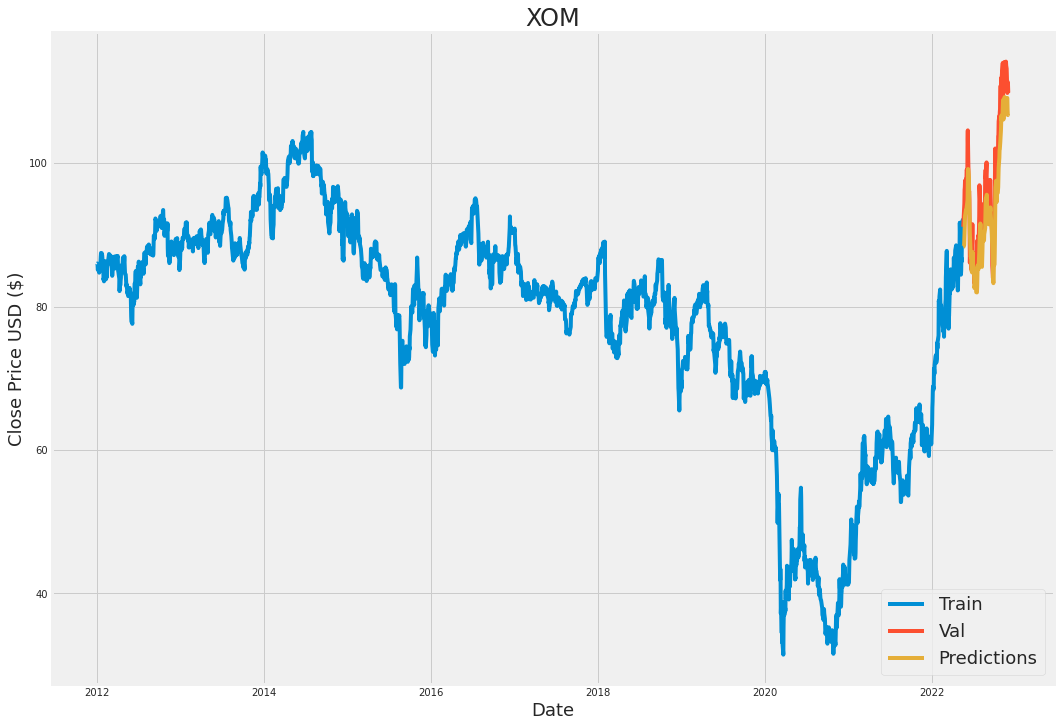

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,12))
plt.title('XOM',fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=18)
plt.show()

[https://www.kaggle.com/code/carlolepelaars/introduction-to-financial-mathematics](http://)

[https://www.kaggle.com/code/davidchilders/financial-risk-management/notebook](http://)

[https://www.kaggle.com/code/piperomeror/quantitative-risk-management](http://)

# Fetch EXC data since the year 2000

In [ ]:
df = DataReader('EXC', data_source='yahoo', start='2000-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values



training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=2, epochs=2)



[array([0.00167052, 0.        , 0.01085832, 0.01127592, 0.01127592,
       0.02547526, 0.02380476, 0.02589288, 0.03341017, 0.03257491,
       0.02714578, 0.03173967, 0.02798102, 0.0350807 , 0.04677424,
       0.04259797, 0.04844474, 0.05596205, 0.05053288, 0.05429155,
       0.05303865, 0.05387391, 0.06598509, 0.06264406, 0.05596205,
       0.05846781, 0.05930306, 0.05554441, 0.05095052, 0.05053288,
       0.04844474, 0.0476095 , 0.04426849, 0.03967458, 0.04134509,
       0.04510373, 0.02923389, 0.03299255, 0.03800408, 0.02464   ,
       0.02756339, 0.03591594, 0.03925696, 0.03424543, 0.02756339,
       0.03048677, 0.03132203, 0.03090441, 0.03006917, 0.02464   ,
       0.03341017, 0.04301561, 0.03257491, 0.03215729, 0.03424543,
       0.02756339, 0.02547526, 0.02923389, 0.02464   , 0.02046373])]
[0.02380475761369663]

[array([0.00167052, 0.        , 0.01085832, 0.01127592, 0.01127592,
       0.02547526, 0.02380476, 0.02589288, 0.03341017, 0.03257491,
       0.02714578, 0.03173967, 0.02

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(16,12))
plt.title('EXC',fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=18)
plt.show()

# <a id='7'>7. Project T2: LSTM vs GRU (Tensorflow)
    
    https://github.com/jakejhc/Portfolio-Projects/blob/main/project-t2-energy-price-prediction-rnn-lstm-gru.ipynb

<a href='#100'> Back to top</a>

# References

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

Time Series Analysis
https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series https://www.kaggle.com/code/jakejhc/time-serials/edit/run/112173265

https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

 https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series

 LSTM:

https://www.kaggle.com/code/dimitreoliveira/deep-learning-for-time-series-forecasting https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

XGboost: https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost

Prophet: https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet

Delhi: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/code

Basics:

https://www.kaggle.com/code/jagangupta/time-series-basics-exploring-traditional-ts https://www.kaggle.com/code/rohanrao/a-modern-time-series-tutorial https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting

FE/https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling

